In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train[345]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 226, 247,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  99, 248, 254, 230,  30,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 125, 254, 254, 254,  38,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 125, 254, 254, 212,  24,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  18, 223, 254, 252, 118,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  24, 254, 254, 239,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  27, 195, 254, 254,  93,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 254, 254, 246,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 158, 254, 254, 185,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         41, 239, 254, 254,  43,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,
        218, 254, 254, 167,   9,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        254, 254, 254, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 187,
        254, 254, 234,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 254,
        254, 254, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 247, 254,
        255, 219,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 254, 254,
        222,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 213, 254, 235,
         45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 194, 254, 254, 223,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 194, 254, 254, 190,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 194, 254, 202,  27,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[345]

np.uint8(1)

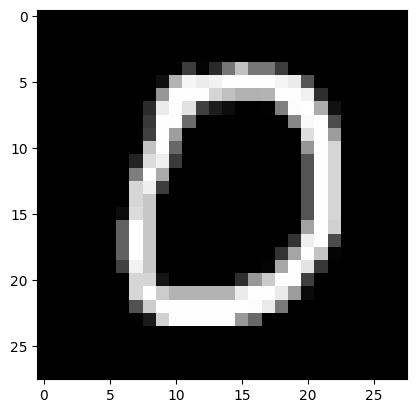

In [ ]:
plt.imshow(x_test[10], cmap='gray')

# Create Model

In [ ]:
model = models.Sequential([
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8245 - loss: 5.9718
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9102 - loss: 0.3808
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9276 - loss: 0.2813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9366 - loss: 0.2410
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9437 - loss: 0.2183


# Evaluate Model

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9290 - loss: 0.2956


[0.2603980302810669, 0.9369999766349792]

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions[1]

array([3.2827140e-07, 6.4609900e-08, 9.9999911e-01, 1.3670456e-07,
       9.0257607e-17, 2.3220987e-07, 1.3151889e-11, 1.3506380e-17,
       5.5236374e-08, 3.8101904e-09], dtype=float32)

In [ ]:
print(np.argmax(predictions[10]))

0


In [ ]:
x_test[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 254, 254, 254,
        213, 192, 178, 178, 180, 254, 254, 241,  46,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  43, 235, 254, 226,  64,
         28,  12,   0,   0,   2, 128, 252, 255, 173,  17,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  56, 254, 253, 107,   0,
          0,   0,   0,   0,   0,   0, 134, 250, 254,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  63, 254, 158,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 221, 254, 157,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 194, 254, 103,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 150, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  34, 220, 239,  58,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 254, 171,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 239,  60,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  11, 219, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 162, 254, 209,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  51, 238, 254,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  51, 165, 254, 195,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 241, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   3, 167, 254, 227,  55,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 213,  20,   0,   0,   0,
          0,   0,  46, 152, 202, 254, 254,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 254, 204, 180, 180, 180,
        180, 180, 235, 254, 254, 234, 156,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  81, 205, 254, 254, 254, 254,
        254, 254, 254, 252, 234, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  26, 210, 254, 254, 254,
        254, 254, 153, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_test[10]

np.uint8(0)